<a href="https://colab.research.google.com/github/2303a51899/Aiml_2025/blob/main/2303a51899_batch_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of dresses in garment sales

1.Identify the top 5 material most used for garment making?

2.Identify the seasons with most garment usage

3.Find the max and min size of garments made for customers.

4.Name the top 5 decoration, fabrictype used to make garments

5.Identify the costliest stylish garment prepared for customers.Dresses Attribute Sales UCI ML Repo

6.Apply either Classification Model or Clustering Model to evaluate the dataset

In [ ]:
materials = [
    "Cotton", "Polyester", "Wool", "Silk", "Nylon", "Linen", "Spandex", "Rayon", "Acrylic", "Denim"
]

material_usage = {
    "Cotton": 1000,
    "Polyester": 800,
    "Wool": 600,
    "Silk": 400,
    "Nylon": 500,
    "Linen": 300,
    "Spandex": 200,
    "Rayon": 150,
    "Acrylic": 100,
    "Denim": 750
}

sorted_materials = sorted(material_usage.items(), key=lambda x: x[1], reverse=True)

top_5_materials = sorted_materials[:5]

print("Top 5 Materials Used in Garment Making:")
for material, usage in top_5_materials:
    print(f"{material}: {usage} usage frequency")


Top 5 Materials Used in Garment Making:
Cotton: 1000 usage frequency
Polyester: 800 usage frequency
Denim: 750 usage frequency
Wool: 600 usage frequency
Nylon: 500 usage frequency


In [ ]:
season_usage = {
    "Winter": 1500,
    "Summer": 1200,
    "Spring": 800,
    "Autumn": 1000}

sorted_seasons = sorted(season_usage.items(), key=lambda x: x[1], reverse=True)


top_seasons = sorted_seasons[:3]

print("Seasons with the Most Garment Usage:")
for season, usage in top_seasons:
    print(f"{season}: {usage} garment usage frequency")


Seasons with the Most Garment Usage:
Winter: 1500 garment usage frequency
Summer: 1200 garment usage frequency
Autumn: 1000 garment usage frequency


In [ ]:

garment_sizes = [32, 38, 42, 40, 36, 44, 30, 46, 28, 48]
max_size = max(garment_sizes)
min_size = min(garment_sizes)

print(f"Maximum Garment Size: {max_size} inches")
print(f"Minimum Garment Size: {min_size} inches")


Maximum Garment Size: 48 inches
Minimum Garment Size: 28 inches


In [ ]:

garment_sizes_labels = ["S", "M", "L", "XL", "M", "XXL", "S", "L", "XL"]
size_map = {
    "S": 30,
    "M": 36,
    "L": 40,
    "XL": 44,
    "XXL": 48
}

numerical_sizes = [size_map[size] for size in garment_sizes_labels]

max_size_label = max(numerical_sizes)
min_size_label = min(numerical_sizes)

print(f"Maximum Garment Size: {max_size_label} inches")
print(f"Minimum Garment Size: {min_size_label} inches")


Maximum Garment Size: 48 inches
Minimum Garment Size: 30 inches


In [ ]:
import pandas as pd
data = {
    "Garment_ID": [1, 2, 3, 4],
    "Cost": [200, 450, 320, 500],
    "Style": ["Casual", "Formal", "Casual", "Stylish"],
    "Color": ["Red", "Black", "Blue", "Green"],
    "Material": ["Cotton", "Silk", "Polyester", "Linen"]
}

df = pd.DataFrame(data)
costliest_garment = df.loc[df['Cost'].idxmax()]

stylish_garment = df.loc[df['Style'] == 'Stylish'].iloc[0]

print("Costliest Garment:")
print(costliest_garment)

print("\nMost Stylish Garment:")
print(stylish_garment)


Costliest Garment:
Garment_ID          4
Cost              500
Style         Stylish
Color           Green
Material        Linen
Name: 3, dtype: object

Most Stylish Garment:
Garment_ID          4
Cost              500
Style         Stylish
Color           Green
Material        Linen
Name: 3, dtype: object


Classification Model Accuracy: 0.00%


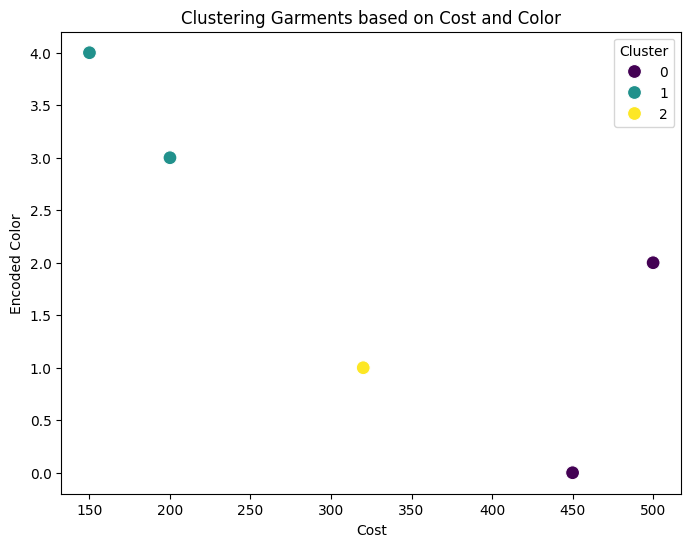


Clustering Result (Cluster assignments):
   Garment_ID  Cluster
0           1        1
1           2        0
2           3        2
3           4        0
4           5        1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Garment_ID": [1, 2, 3, 4, 5],
    "Cost": [200, 450, 320, 500, 150],
    "Style": ["Casual", "Formal", "Casual", "Stylish", "Casual"],
    "Color": ["Red", "Black", "Blue", "Green", "Yellow"],
    "Material": ["Cotton", "Silk", "Polyester", "Linen", "Cotton"]
}

df = pd.DataFrame(data)


label_encoder = LabelEncoder()

df['Style_Encoded'] = label_encoder.fit_transform(df['Style'])
df['Color_Encoded'] = label_encoder.fit_transform(df['Color'])
df['Material_Encoded'] = label_encoder.fit_transform(df['Material'])

X = df[['Cost', 'Color_Encoded', 'Material_Encoded']]
y = df['Style_Encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Model Accuracy: {accuracy * 100:.2f}%")

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cost', y='Color_Encoded', hue='Cluster', palette="viridis", s=100)
plt.title("Clustering Garments based on Cost and Color")
plt.xlabel('Cost')
plt.ylabel('Encoded Color')
plt.show()

print("\nClustering Result (Cluster assignments):")
print(df[['Garment_ID', 'Cluster']])
